In [1]:
import pandas as pd
from pingouin import cronbach_alpha

# read in the data
data = pd.read_csv('happy_data.csv')

# group the data by participant and stimulus set
grouped_data = data.groupby(['participant', 'stimulus_set'])

# get a list of the reaction times for each participant and stimulus set
rt_lists = [group['rt'].tolist() for _, group in grouped_data]

rt_lists

[[754.0,
  854.0,
  568.0,
  526.0,
  510.0,
  638.0,
  674.0,
  580.0,
  709.0,
  376.0,
  602.0,
  717.0,
  722.0,
  1326.0,
  729.0,
  485.0,
  752.0,
  578.0,
  918.0],
 [456.0,
  626.0,
  425.0,
  749.0,
  456.0,
  535.0,
  426.0,
  705.0,
  515.0,
  419.0,
  430.0,
  652.0,
  440.0,
  587.0,
  527.0,
  516.0,
  551.0,
  579.0,
  403.0,
  507.0],
 [789.0,
  1120.0,
  445.0,
  403.0,
  503.0,
  546.0,
  393.0,
  824.0,
  928.0,
  1274.0,
  709.0,
  536.0,
  493.0,
  694.0,
  466.0,
  430.0,
  528.0,
  1115.0],
 [517.0,
  560.0,
  961.0,
  479.0,
  510.0,
  534.0,
  616.0,
  644.0,
  512.0,
  681.0,
  466.0,
  528.0,
  507.0,
  426.0,
  404.0,
  621.0,
  494.0,
  1177.0,
  736.0,
  525.0,
  632.0],
 [641.0,
  653.0,
  684.0,
  518.0,
  943.0,
  926.0,
  579.0,
  843.0,
  613.0,
  730.0,
  482.0,
  684.0,
  719.0,
  654.0,
  457.0,
  553.0,
  642.0,
  638.0,
  655.0,
  795.0],
 [391.0,
  417.0,
  535.0,
  580.0,
  1747.0,
  1558.0,
  556.0,
  669.0,
  539.0,
  456.0,
  547.0,
  969.0

In [2]:
rt_lists = pd.DataFrame(rt_lists)

# calculate Cronbach's alpha for the reaction times
alpha = cronbach_alpha(rt_lists)

print(f"Cronbach's alpha for reaction times: {alpha}")

Cronbach's alpha for reaction times: (0.9084522143504165, array([0.906, 0.91 ]))


In [3]:
alpha

(0.9084522143504165, array([0.906, 0.91 ]))

<AxesSubplot: xlabel='gender', ylabel='rt'>

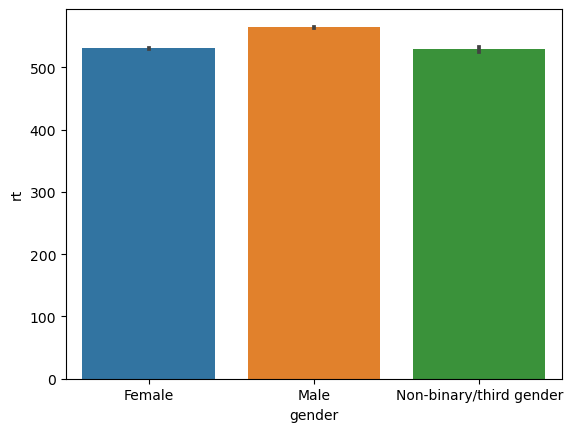

In [4]:
import seaborn as sns

sns.barplot(x='gender', y='rt', data=data)

<AxesSubplot: xlabel='age', ylabel='rt'>

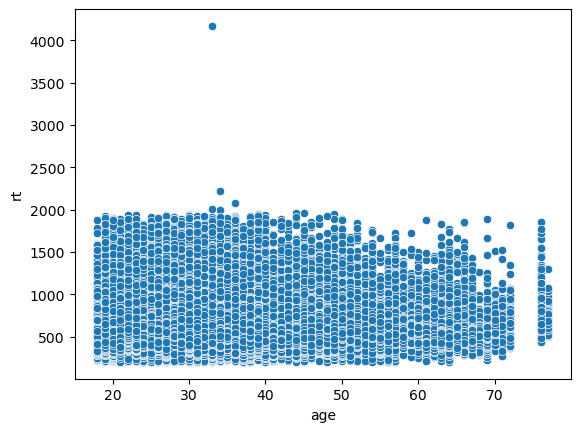

In [5]:
sns.scatterplot(x='age', y='rt', data=data)

<AxesSubplot: xlabel='stimulus_set', ylabel='rt'>

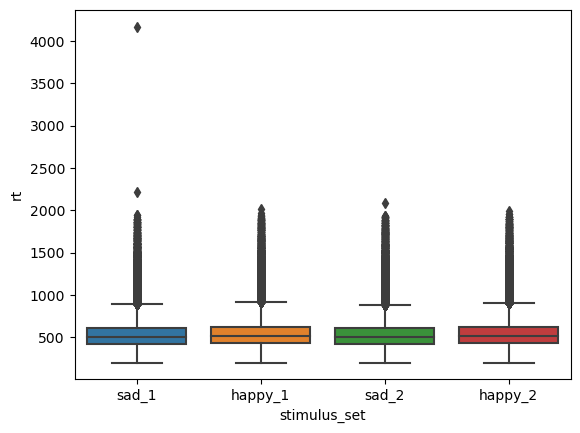

In [6]:
sns.boxplot(x='stimulus_set', y='rt', data=data)

Text(0.5, 1.0, 'Mean Reaction Time by Stimulus Set')

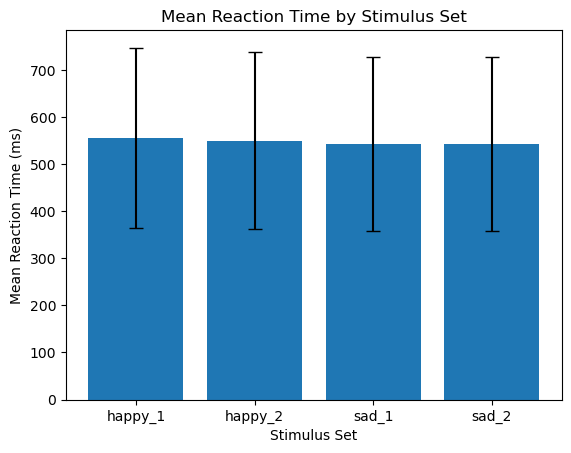

In [7]:
import numpy as np
import matplotlib.pyplot as plt

rt_means = data.groupby('stimulus_set')['rt'].mean()
rt_stds = data.groupby('stimulus_set')['rt'].std()

fig, ax = plt.subplots()
ax.bar(rt_means.index, rt_means.values, yerr=rt_stds.values, capsize=5)
ax.set_ylabel('Mean Reaction Time (ms)')
ax.set_xlabel('Stimulus Set')
ax.set_title('Mean Reaction Time by Stimulus Set')

<AxesSubplot: xlabel='force', ylabel='rt'>

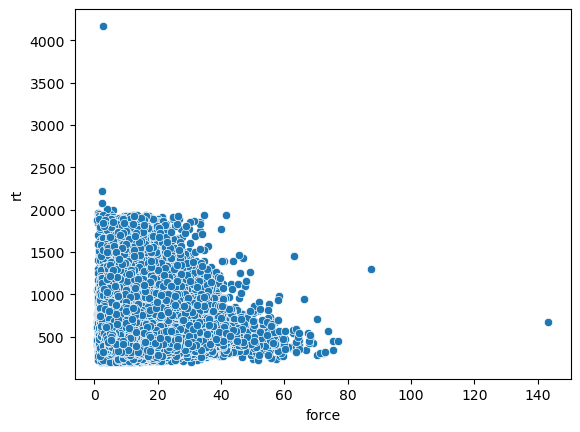

In [8]:
sns.scatterplot(x='force', y='rt', data=data)

<AxesSubplot: xlabel='rt', ylabel='Count'>

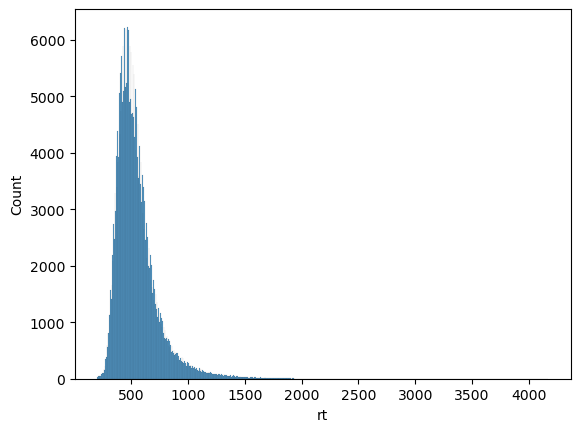

In [9]:
sns.histplot(x='rt', data=data)

In [10]:
import pingouin as pg

# Conduct ANOVA on reaction times
aov = pg.anova(data=data, dv='rt', between='stimulus_set', detailed=True)
print(aov)


         Source            SS      DF            MS          F         p-unc  \
0  stimulus_set  1.017634e+07       3  3.392112e+06  96.436322  2.185454e-62   
1        Within  1.130217e+10  321316  3.517463e+04        NaN           NaN   

      np2  
0  0.0009  
1     NaN  


In [11]:
pg.print_table(aov)


ANOVA SUMMARY

Source                     SS      DF           MS        F    p-unc      np2
------------  ---------------  ------  -----------  -------  -------  -------
stimulus_set     10176336.039       3  3392112.013   96.436    0.000    0.001
Within        11302171633.170  321316    35174.631  nan      nan      nan



In [12]:
aov_interaction = pg.anova(data=data, dv='rt', between=['stimulus_set', 'response'], detailed=True)
pg.print_table(aov_interaction)



ANOVA SUMMARY

Source                                SS          DF            MS         F    p-unc      np2
-----------------------  ---------------  ----------  ------------  --------  -------  -------
stimulus_set                10835256.003       3.000   3611752.001   104.376    0.000    0.001
response                    30911941.336       1.000  30911941.336   893.320    0.000    0.003
stimulus_set * response    152759851.551       3.000  50919950.517  1471.529    0.000    0.014
Residual                 11118499840.284  321312.000     34603.438   nan      nan      nan



The ANOVA tables show the results of two separate analyses, one for stimulus set and one for response.

For stimulus set, the main effect of stimulus set is significant (F(3, 321316) = 96.436, p < 0.001, np2 = 0.001), indicating that there are differences in reaction times between the four stimulus sets. However, the effect size (np2 = 0.001) is very small, suggesting that the practical significance of the differences may be limited.

For response, the main effect of response is significant (F(1, 321312) = 893.320, p < 0.001, np2 = 0.003), indicating that there are differences in reaction times between the two response options (left vs right button press). The effect size (np2 = 0.003) is small to medium, suggesting that the differences may have some practical significance.

Finally, the interaction between stimulus set and response is also significant (F(3, 321312) = 1471.529, p < 0.001, np2 = 0.014), indicating that the effect of stimulus set on reaction times depends on the response option. The effect size (np2 = 0.014) is medium, suggesting that the interaction may have practical significance.

Overall, these results suggest that both stimulus set and response have an effect on reaction times, and that the effect of stimulus set depends on the response option chosen. However, the practical significance of these effects may be limited, especially for stimulus set.

# Factor Analysis

<AxesSubplot: >

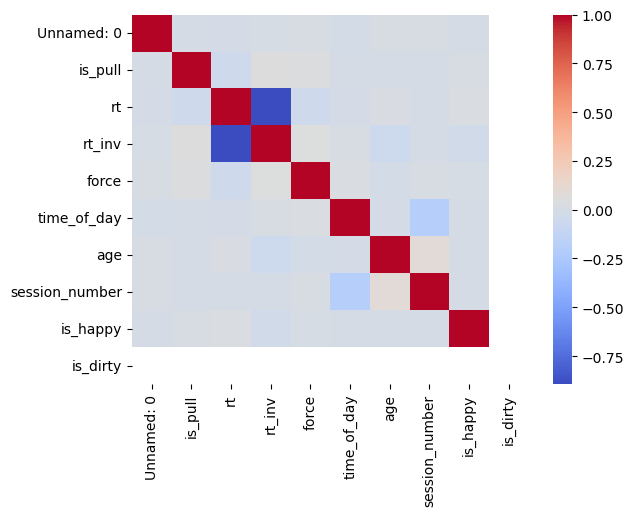

In [13]:
import pandas as pd
import seaborn as sns

# Load the data into a pandas dataframe
df = pd.read_csv('happy_data.csv')

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=False)

In [21]:
import pickle

df = pd.read_csv('happy_data_device.csv')
df

,Unnamed: 0,participant,PID_fixed,experiment,session,device,stimulus_set,stimulus,is_pull,rt,...,C5_03,C5_04,C5_05,C5_06,C5_07,is_happy,is_dirty,session_number_c,is_happy_c,is_pull_c
0,106,kekytm5d,5e1f9c6e105841000c7740d9,session6,push_sad_aat_1_session,Pixel 4a,sad_1,t3_a_pms8_sad,False,403.0,...,2.0,5.0,5.0,2.0,2.0,False,False,2.233179,-0.272259,-0.499916
1,107,kekytm5d,5e1f9c6e105841000c7740d9,session6,push_sad_aat_1_session,Pixel 4a,happy_1,t14_w_cih2_happy,True,492.0,...,2.0,5.0,5.0,2.0,2.0,True,False,2.233179,0.727741,0.500084
2,108,kekytm5d,5e1f9c6e105841000c7740d9,session6,push_sad_aat_1_session,Pixel 4a,happy_1,t3_a_cih2_happy,True,730.0,...,2.0,5.0,5.0,2.0,2.0,True,False,2.233179,0.727741,0.500084
3,109,kekytm5d,5e1f9c6e105841000c7740d9,session6,push_sad_aat_1_session,Pixel 4a,sad_1,t3_w_pms8_sad,False,645.0,...,2.0,5.0,5.0,2.0,2.0,False,False,2.233179,-0.272259,-0.499916
4,111,kekytm5d,5e1f9c6e105841000c7740d9,session6,push_sad_aat_1_session,Pixel 4a,happy_1,t9_w_adh2_happy,True,749.0,...,2.0,5.0,5.0,2.0,2.0,True,False,2.233179,0.727741,0.500084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321315,924294,kcap0xzb,5d42486206811e001ada5b4b,session4,push_sad_aat_1_session,SM-A205G,happy_2,t20_af_adh2_happy,False,611.0,...,5.0,1.0,2.0,5.0,5.0,True,False,0.233179,0.727741,-0.499916
321316,924295,kcap0xzb,5d42486206811e001ada5b4b,session4,push_sad_aat_1_session,SM-A205G,sad_2,t14_w_pms6_sad,True,740.0,...,5.0,1.0,2.0,5.0,5.0,False,False,0.233179,-0.272259,0.500084
321317,924296,kcap0xzb,5d42486206811e001ada5b4b,session4,push_sad_aat_1_session,SM-A205G,sad_2,t20_a_pms6_sad,True,1218.0,...,5.0,1.0,2.0,5.0,5.0,False,False,0.233179,-0.272259,0.500084
321318,924297,kcap0xzb,5d42486206811e001ada5b4b,session4,push_sad_aat_1_session,SM-A205G,sad_2,t15_wf_pms8_sad,True,605.0,...,5.0,1.0,2.0,5.0,5.0,False,False,0.233179,-0.272259,0.500084


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('rt ~ C(device) * C(stimulus_set)', df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(aov_table)


                                 sum_sq        df           F         PR(>F)
C(device)                  8.947404e+08     375.0   73.922533   0.000000e+00
C(stimulus_set)            1.013573e+07       3.0  104.675474   9.887170e-68
C(device):C(stimulus_set)  8.483014e+07    1125.0    2.336193  5.376137e-121
Residual                   1.032260e+10  319816.0         NaN            NaN


: 